In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score

In [2]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [3]:
sample_submission = pd.read_csv('sample_submission_dataset.csv')
test_data = pd.read_csv('test_dataset.csv')
training_data = pd.read_csv('train_dataset.csv')

In [39]:
test_data

,ID,headline
0,5f99b099-c4db-4a02-9753-28c5e94a6b34,Israeli military launches airstrikes into Gaza...
1,3c413552-32c0-4000-a745-b4217fe427ca,Expelled' fair use upheld
2,71060e3b-bab0-4218-b1ce-8284ae46f6c3,31 Times Frankie Boyle's Twitter Was Out Of Co...
3,f0a03121-600f-4b69-b6db-989d0f3cf28a,What Does Your Zodiac Sign Say About Your Love...
4,456f7cfa-bdfe-45bd-9e88-7c4ae53eb4ba,Larson B ice-shelf collapse reveals exotic org...
...,...,...
15195,be658ab2-e073-4078-8d23-999bce6f0980,All The Hottest New Facial Expressions For Women
15196,3b876ee2-66c2-4743-8389-c93c2f598398,Kendall Jenner Posed Topless And She Looks Lik...
15197,f565e8b5-d6f0-4fb5-b1eb-3048d3e5d57a,Valech Report released
15198,c0bc2203-cd7a-46c2-9e9b-5f41ea1bb346,18 Hot And Delicious Slow Cooker Stews


In [4]:
training_data.head()

,headline,clickbait,ID
0,"Hussein enters ""not guilty"" plea at trial",0,84698cc7-8ae2-4ea3-a425-b7091561cee6
1,Iraq peace talks draw to a close in Finland,0,a4e35ca4-15fa-43e8-b68e-91457b23afee
2,British Premier Visits Northern Ireland,0,162991ee-ea2f-41ad-a753-649a68f54311
3,The Decline of Left-Handed First Basemen,0,2cd3aa32-6ec2-4af1-bd1d-560709066b8b
4,Who Said It: Donald Trump Or Kanye West,1,72553370-c348-4603-882b-39e04b610c39


In [5]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'[a-zA-Z0-9]+')

In [ ]:
preprocessed_data = [tokenizer.tokenize(list(training_data['headline'])[i]) for i in range(len(training_data))]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(training_data['headline'], training_data['clickbait'], random_state=0)

In [32]:
tfidf = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))
tfidf_text_train = tfidf.fit_transform(X_train)
tfidf_text_test = tfidf.transform(X_test)

In [15]:
#creating a function to call after each model iteration to print accuracy and recall scores for test and train
def train_results(preds):
    return "Training Accuracy:", accuracy_score(y_train,preds)," Training Recall:", recall_score(y_train,preds), "F1-score:", f1_score(y_train, preds)

def test_results(preds):
    return "Testing Accuracy:", accuracy_score(y_test,preds)," Testing Recall:", recall_score(y_test,preds),"F1-score:", f1_score(y_test, preds)

In [16]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(tfidf_text_train, y_train)

nb_train_preds = nb_classifier.predict(tfidf_text_train)
nb_test_preds = nb_classifier.predict(tfidf_text_test)

print(train_results(nb_train_preds))
print(test_results(nb_test_preds))

('Training Accuracy:', 0.9991228070175439, ' Training Recall:', 0.9986780646867013, 'F1-score:', 0.9991183212837241)
('Testing Accuracy:', 0.975, ' Testing Recall:', 0.9771012230028624, 'F1-score:', 0.9753246753246754)


In [53]:
final_x_test = test_data['headline']
tfidf_final_text_test = tfidf.transform(final_x_test )
nb_final_test_preds = nb_classifier.predict(tfidf_final_text_test)

In [56]:
pred_df = pd.DataFrame(nb_final_test_preds)
final_df = test_data.join(pred_df)

In [62]:
final_df_ = final_df[['ID', 0]]

In [63]:
final_df_  = final_df_.rename(columns={0: 'TARGET'})

In [65]:
final_df_.to_csv('submission_001.csv',index=None)

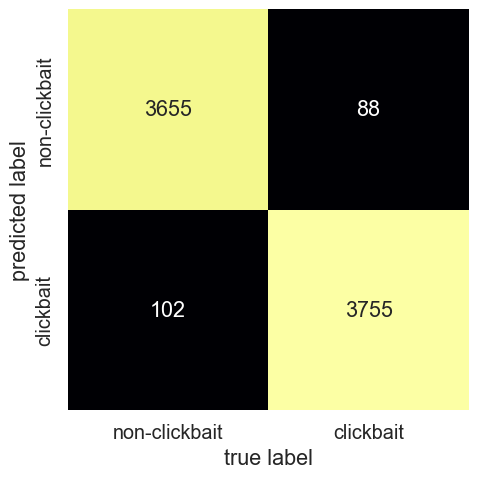

In [11]:
#confusion matrix on test set NB Classifier
sns.set()

cm_dc = confusion_matrix(y_test, nb_test_preds)
sns.set(font_scale=1.3)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.tight_layout()
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show();

In [17]:
#rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators = 900 )
rf_classifier = RandomForestClassifier(class_weight = 'balanced' )
rf_classifier.fit(tfidf_text_train, y_train)

rf_test_preds = rf_classifier.predict(tfidf_text_test)
rf_train_preds = rf_classifier.predict(tfidf_text_train)

print(train_results(rf_train_preds))
print(test_results(rf_test_preds))

('Training Accuracy:', 1.0, ' Training Recall:', 1.0, 'F1-score:', 1.0)
('Testing Accuracy:', 0.9406578947368421, ' Testing Recall:', 0.9820452771272443, 'F1-score:', 0.9436179522440304)


C:\Users\kesa1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


('Training Accuracy:', 0.9999561403508772, ' Training Recall:', 0.9999118709791134, 'F1-score:', 0.9999559335477901)
('Testing Accuracy:', 0.9727631578947369, ' Testing Recall:', 0.9731980223783503, 'F1-score:', 0.9730714192793027)


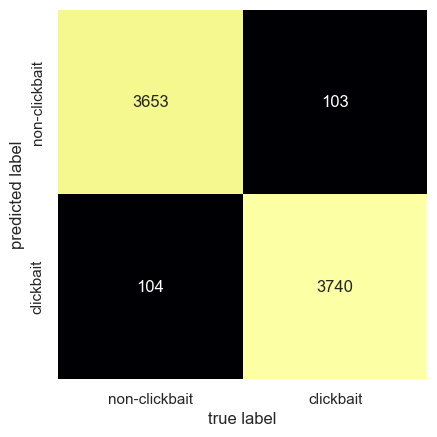

In [18]:
#SVM Model
#svm_classifier = svm.SVC(kernel = 'linear', decision_function_shape='ovo')
svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

svm_classifier.fit(tfidf_text_train, y_train)

svm_test_preds = svm_classifier.predict(tfidf_text_test)
svm_train_preds = svm_classifier.predict(tfidf_text_train)

print(train_results(svm_train_preds))
print(test_results(svm_test_preds))

#confusion matrix on test set SVM Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, svm_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

('Training Accuracy:', 0.9999561403508772, ' Training Recall:', 0.9999118709791134, 'F1-score:', 0.9999559335477901)
('Testing Accuracy:', 0.9732894736842105, ' Testing Recall:', 0.9724173822534479, 'F1-score:', 0.9735573791845773)


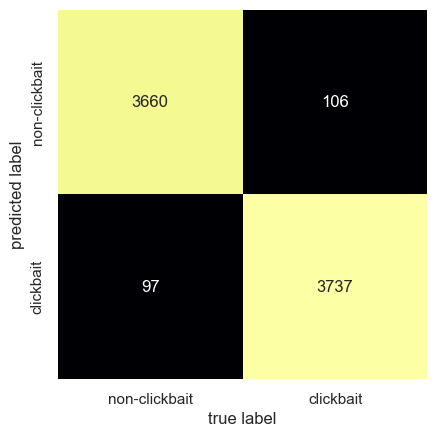

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=500, class_weight = 'balanced', solver = 'liblinear', tol=0.0001)

lr.fit(tfidf_text_train, y_train)

lr_train_preds = lr.predict(tfidf_text_train)
lr_test_preds = lr.predict(tfidf_text_test)

print(train_results(lr_train_preds))
print(test_results(lr_test_preds))

#confusion matrix on test set lr Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, lr_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [20]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()

D_train = xgb.DMatrix(tfidf_text_train, label=y_train)
D_test = xgb.DMatrix(tfidf_text_test, label=y_test)

xgb_clf.train(D_train)
xgb_test_preds = xgb_clf.predict(D_test)
xgb_train_preds = xgb_clf.predict(D_train)

#print(train_results(lr_train_preds))
print(test_results(xgb_test_preds))
print(train_results(xgb_train_preds))
#confusion matrix on test set xgboost Classifier 
sns.set()

cm_dc = confusion_matrix(y_test, xgb_test_preds)
sns.heatmap(cm_dc.T, square=True, annot=True, fmt='d', cbar=False,cmap="inferno", xticklabels=['non-clickbait','clickbait'],yticklabels=['non-clickbait','clickbait']
            )
plt.xlabel('true label')
plt.ylabel('predicted label')

AttributeError: 'XGBClassifier' object has no attribute 'train'